[
    {
        "通報日": "2020/1/15",
        "法定傳染病通報": "0",
        "居家檢疫送驗": "0",
        "擴大監測送驗": "0",
        "Total": "0"
    },
    {
        "通報日": "2020/1/16",
        "法定傳染病通報": "4",
        "居家檢疫送驗": "0",
        "擴大監測送驗": "0",
        "Total": "4"
    },
    {
        "通報日": "2020/1/17",
        "法定傳染病通報": "0",
        "居家檢疫送驗": "0",
        "擴大監測送驗": "0",
        "Total": "0"
    },
    {
        "通報日": "2020/1/18",
        "法定傳染病通報": "1",
        "居家檢疫送驗": "0",
        "擴大監測送驗": "0",
        "Total": "1"
    },
    {
        "通報日": "2020/1/19",
        "法定傳染病通報": "1",
        "居家檢疫送驗": "0",
        "擴大監測送驗": "0",
        "Total": "1"
    },
    {
        "通報日": "2020/1/20",
        "法定傳染病通報": "2",
        "居家檢疫送驗": "0",
        "擴大監測送驗": "0",
        "Total": "2"
    },
    {
        "通報日": "2020/1/21",
        "法定傳染病通報": "12",
        "居家檢疫送驗": "0",
        "擴大監測送驗": "0",
        "Total": "12"
    },
    {
        "通報日": "2020/1/22",
        "法定傳染病通報": "44",
        "居家檢疫

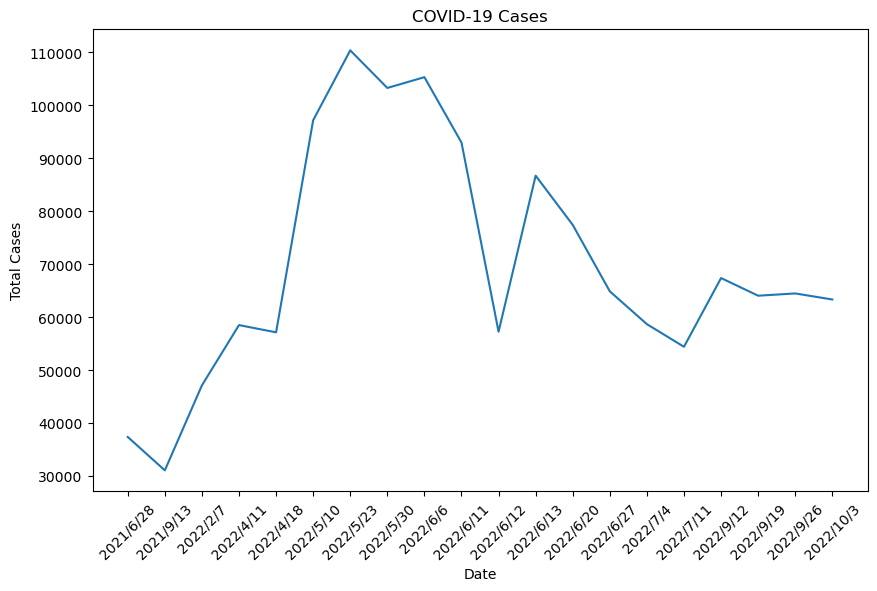

In [46]:
import json
import requests
import matplotlib.pyplot as plt

def get_data_from_url(url):
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Error:", response.status_code)
        return None

def print_formatted_data(data):
    if data is not None:
        formatted_data = json.dumps(data, indent=4, ensure_ascii=False)
        print(formatted_data)

def calculate_daily_changes(data):
    daily_changes = {}

    for i in range(1, len(data)):
        date = data[i]['通報日']
        cases = int(data[i]['Total'])
        prev_cases = int(data[i - 1]['Total'])
        change = cases - prev_cases
        daily_changes[date] = abs(change)

    return daily_changes

def visualize_covid_cases(data, num_dates=10):
    if data is not None:
        daily_changes = calculate_daily_changes(data)

        # 根據變化量的絕對值進行排序
        sorted_dates = sorted(daily_changes, key=daily_changes.get, reverse=True)

        dates = []
        cases = []

        for row in data:
            date = row['通報日']
            if date in sorted_dates[:num_dates]:
                dates.append(date)
                cases.append(int(row['Total']))

        plt.figure(figsize=(10, 6))
        plt.plot(dates, cases)
        plt.xlabel('Date')
        plt.ylabel('Total Cases')
        plt.title('COVID-19 Cases')
        plt.xticks(rotation=45)
        plt.show()

def fetch_and_visualize_data(url, num_dates=10):
    data = get_data_from_url(url)
    print_formatted_data(data)
    visualize_covid_cases(data, num_dates)

# 呼叫函式
url = "https://quality.data.gov.tw/dq_download_json.php?nid=120451&md5_url=d6c9b5b57b4fa6435fcf7492817e76c4"
fetch_and_visualize_data(url, num_dates=20)
